# Analyzing Amazon Reviews

Data downloaded from: http://sifaka.cs.uiuc.edu/~wang296/Data/index.html

**INSTRUCTIONS - Please read carefully.**

1. If you are unclear on how to proceed at any point you can
    - raise your hand and ask for help during the class
    - post to Piazza for help after the class
    - visit office hours to receive help

<HR/>

## <font color='red'/>Student Name:</font>

#### *Yash Malhan*

<hr/>


## <font color='blue'>Context</font>

<HR/>

We will work with a dataset of Amazon product reviews. We will use a subset of the data (a 5-core subset of appliance reviews). 

The key questions that we will try to answer are: 
- Which is the highest rated product? 
- Which product would you buy/ recommend?
- What is the overall (shape of the) distribution of product reviews?
- Is the length of the product review related to the assigned rating?


<BR/>
<BR/>
<HR/>


### Start by reading the data into dataframes and examining it. The data is in the files "laptop_reviews_small.json" and "laptop_products_small.json" located in the scratch folder. 

In [2]:
import pandas as pd
reviews = pd.read_json('../scratch/laptop_reviews_small.json', orient = 'records')
products = pd.read_json('../scratch/laptop_products_small.json', orient = 'records')

In [3]:
products.head()

,Price,Features,Name,ImgURL,ProductID
0,Unavailable,Intel Core 2 Duo Processor 2.53GHz\n4GB DDR3 R...,Apple MacBook ProMB991LL/A 13.3 Inch Laptop,"\ndata:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAA...",B002C7446A
1,Unavailable,Intel Core 2 Duo Processor 2.53GHz\n4GB DDR3 R...,Apple MacBook Pro MC118LL/A 15.4-Inch Laptop,"\ndata:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAA...",B002C744K6
2,Unavailable,Intel Core 2 Duo Processor 2.8GHz\n4GB DDR3 RA...,Apple MacBook Pro MB986LL/A 15.4-Inch Laptop 2...,"\ndata:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAA...",B002C745OQ
3,None,None,None,None,B002C746FE
4,Unavailable,Intel Core 2 Duo Processor 1.7GHz\n2GB DDR3 RA...,Apple MacBook Air MC234LL/A 13.3-Inch Laptop (...,"\ndata:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAA...",B002C747XA


In [4]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      308 non-null    object
 1   Features   299 non-null    object
 2   Name       308 non-null    object
 3   ImgURL     308 non-null    object
 4   ProductID  601 non-null    object
dtypes: object(5)
memory usage: 23.6+ KB


In [5]:
#replace column value
import numpy as np
products['Price'].replace('Unavailable',np.NaN, inplace = True)
products.head()

,Price,Features,Name,ImgURL,ProductID
0,NaN,Intel Core 2 Duo Processor 2.53GHz\n4GB DDR3 R...,Apple MacBook ProMB991LL/A 13.3 Inch Laptop,"\ndata:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAA...",B002C7446A
1,NaN,Intel Core 2 Duo Processor 2.53GHz\n4GB DDR3 R...,Apple MacBook Pro MC118LL/A 15.4-Inch Laptop,"\ndata:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAA...",B002C744K6
2,NaN,Intel Core 2 Duo Processor 2.8GHz\n4GB DDR3 RA...,Apple MacBook Pro MB986LL/A 15.4-Inch Laptop 2...,"\ndata:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAA...",B002C745OQ
3,None,None,None,None,B002C746FE
4,NaN,Intel Core 2 Duo Processor 1.7GHz\n2GB DDR3 RA...,Apple MacBook Air MC234LL/A 13.3-Inch Laptop (...,"\ndata:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAA...",B002C747XA


In [7]:
products['Price'].replace('None',np.NaN, inplace = True) #replace None
products.head()

,Price,Features,Name,ImgURL,ProductID
0,NaN,Intel Core 2 Duo Processor 2.53GHz\n4GB DDR3 R...,Apple MacBook ProMB991LL/A 13.3 Inch Laptop,"\ndata:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAA...",B002C7446A
1,NaN,Intel Core 2 Duo Processor 2.53GHz\n4GB DDR3 R...,Apple MacBook Pro MC118LL/A 15.4-Inch Laptop,"\ndata:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAA...",B002C744K6
2,NaN,Intel Core 2 Duo Processor 2.8GHz\n4GB DDR3 RA...,Apple MacBook Pro MB986LL/A 15.4-Inch Laptop 2...,"\ndata:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAA...",B002C745OQ
3,None,None,None,None,B002C746FE
4,NaN,Intel Core 2 Duo Processor 1.7GHz\n2GB DDR3 RA...,Apple MacBook Air MC234LL/A 13.3-Inch Laptop (...,"\ndata:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAA...",B002C747XA


In [8]:
products.fillna(np.NaN, inplace= True)  #None would not be replaced
products.head()

,Price,Features,Name,ImgURL,ProductID
0,NaN,Intel Core 2 Duo Processor 2.53GHz\n4GB DDR3 R...,Apple MacBook ProMB991LL/A 13.3 Inch Laptop,"\ndata:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAA...",B002C7446A
1,NaN,Intel Core 2 Duo Processor 2.53GHz\n4GB DDR3 R...,Apple MacBook Pro MC118LL/A 15.4-Inch Laptop,"\ndata:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAA...",B002C744K6
2,NaN,Intel Core 2 Duo Processor 2.8GHz\n4GB DDR3 RA...,Apple MacBook Pro MB986LL/A 15.4-Inch Laptop 2...,"\ndata:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAA...",B002C745OQ
3,NaN,NaN,NaN,NaN,B002C746FE
4,NaN,Intel Core 2 Duo Processor 1.7GHz\n2GB DDR3 RA...,Apple MacBook Air MC234LL/A 13.3-Inch Laptop (...,"\ndata:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAA...",B002C747XA


In [170]:
reviews.head()

,Title,Author,ReviewID,Overall,Content,Date,ProductID
0,Switched from Windows: More good than bad. Gr...,Jeffrey Stanley,R1DA3BK8I1XXDW,4,This is my first Mac computer. My first four ...,2009-07-06,B002C7446A
1,Macbook graduates to PRO status!,"Nate ""bigetan""",R3IO3TVYYXPJVE,5,Well I must say I am very happy i did not buy ...,2009-06-15,B002C7446A
2,Not sure why all of the haters keep griping ab...,DR,R29AN2GC4M6VZO,5,"I just got my brand new 13.3"" Macbook Pro in t...",2009-06-30,B002C7446A
3,Apple's lightest full-featured notebook,Cuyler,R3NW0EN92LKU0J,4,"There are lots of positives. First, the alumi...",2009-06-23,B002C7446A
4,A True Pro Laptop,A. Chan,R16ZRDX88506KF,5,"I purchased the Unibody MacBook in October, an...",2009-06-16,B002C7446A


In [171]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10671 entries, 0 to 10670
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Title      10670 non-null  object        
 1   Author     10663 non-null  object        
 2   ReviewID   10671 non-null  object        
 3   Overall    10671 non-null  int64         
 4   Content    10665 non-null  object        
 5   Date       10670 non-null  datetime64[ns]
 6   ProductID  10671 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 583.7+ KB


<BR/>
<BR/>
<HR/>

### Which is the highest rated product?

In [172]:
grp_data = reviews.groupby('ProductID')['Overall'].mean().sort_values(ascending = False)
grp_data

ProductID
B0036BEXK8    5.0
B00480Y3ZQ    5.0
B006CMV9UA    5.0
B002P3C8QY    5.0
B006RA0ODK    5.0
             ... 
B003XO7PNU    1.0
B002KEJ2SU    1.0
B004MN6UFA    1.0
B006GT4XRK    1.0
B005MKQ2N2    1.0
Name: Overall, Length: 556, dtype: float64

In [173]:
ggrp_data = reviews.groupby('ProductID')['Overall'].aggregate(ProductID ='count',Overall = 'mean').sort_values(by = 'Overall', ascending = False)
ggrp_data

,ProductID,Overall
ProductID,,
B0036BEXK8,1,5.0
B00480Y3ZQ,2,5.0
B006CMV9UA,1,5.0
B002P3C8QY,1,5.0
B006RA0ODK,3,5.0
...,...,...
B003XO7PNU,1,1.0
B002KEJ2SU,1,1.0
B004MN6UFA,1,1.0


In [174]:
cgrp_data = reviews.groupby('ProductID')['Overall'].count().sort_values(ascending = False)
cgrp_data

ProductID
B007470SMM    698
B0074712UY    606
B0074703CM    420
B00746YMHA    240
B005CWIVYI    232
             ... 
B004IBR0CI      1
B004HYHVPC      1
B0034SIU8O      1
B0030YXIZ2      1
B004NEEDPC      1
Name: Overall, Length: 556, dtype: int64

In [175]:
grp_data[grp_data == 5]

ProductID
B0036BEXK8    5.0
B00480Y3ZQ    5.0
B006CMV9UA    5.0
B002P3C8QY    5.0
B006RA0ODK    5.0
B006RA0A4S    5.0
B005PWJTOQ    5.0
B005UP9L6Y    5.0
B005WE5752    5.0
B006NG6DEM    5.0
B00591714I    5.0
B005Z5WDKK    5.0
B005ZUIJ0S    5.0
B00632N8FI    5.0
B00487X27O    5.0
B00666TA0S    5.0
B006H4U9CM    5.0
B002SG7LWO    5.0
B00713KFSQ    5.0
B0066TA50O    5.0
B002N80O3A    5.0
B0051OLWHU    5.0
B004TD0SS8    5.0
B0034SIU8O    5.0
B004WAAJ7I    5.0
B004YXGFDU    5.0
B003SDWQEY    5.0
B003V8SE4W    5.0
B004O6FGYG    5.0
B002FM7F9U    5.0
B004IBR0CI    5.0
B004HYHVPC    5.0
B0056MYT04    5.0
B002KSRZYY    5.0
Name: Overall, dtype: float64

In [176]:
merged_data = products.merge(reviews, how = 'inner', left_on = 'ProductID', right_on = 'ProductID')
merged_data.head()

,Price,Features,Name,ImgURL,ProductID,Title,Author,ReviewID,Overall,Content,Date
0,NaN,Intel Core 2 Duo Processor 2.53GHz\n4GB DDR3 R...,Apple MacBook ProMB991LL/A 13.3 Inch Laptop,"\ndata:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAA...",B002C7446A,Switched from Windows: More good than bad. Gr...,Jeffrey Stanley,R1DA3BK8I1XXDW,4,This is my first Mac computer. My first four ...,2009-07-06
1,NaN,Intel Core 2 Duo Processor 2.53GHz\n4GB DDR3 R...,Apple MacBook ProMB991LL/A 13.3 Inch Laptop,"\ndata:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAA...",B002C7446A,Macbook graduates to PRO status!,"Nate ""bigetan""",R3IO3TVYYXPJVE,5,Well I must say I am very happy i did not buy ...,2009-06-15
2,NaN,Intel Core 2 Duo Processor 2.53GHz\n4GB DDR3 R...,Apple MacBook ProMB991LL/A 13.3 Inch Laptop,"\ndata:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAA...",B002C7446A,Not sure why all of the haters keep griping ab...,DR,R29AN2GC4M6VZO,5,"I just got my brand new 13.3"" Macbook Pro in t...",2009-06-30
3,NaN,Intel Core 2 Duo Processor 2.53GHz\n4GB DDR3 R...,Apple MacBook ProMB991LL/A 13.3 Inch Laptop,"\ndata:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAA...",B002C7446A,Apple's lightest full-featured notebook,Cuyler,R3NW0EN92LKU0J,4,"There are lots of positives. First, the alumi...",2009-06-23
4,NaN,Intel Core 2 Duo Processor 2.53GHz\n4GB DDR3 R...,Apple MacBook ProMB991LL/A 13.3 Inch Laptop,"\ndata:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAA...",B002C7446A,A True Pro Laptop,A. Chan,R16ZRDX88506KF,5,"I purchased the Unibody MacBook in October, an...",2009-06-16


In [177]:
pdata = merged_data.groupby('ProductID')[['Overall', 'ReviewID']].aggregate({'Overall':'mean', 'ReviewID':'nunique'}).sort_values(by = 'Overall', ascending = False)
top5_product = pdata[pdata['Overall'] == 5].sort_values(by = 'ReviewID', ascending = False).head(5).index.to_list()
top5_product

['B00487X27O', 'B005PWJTOQ', 'B002KSRZYY', 'B0066TA50O', 'B006H4U9CM']

In [178]:
products[products['ProductID'] == top5_product[0]]

,Price,Features,Name,ImgURL,ProductID
252,NaN,NaN,NaN,NaN,B00487X27O


In [179]:
products[products['ProductID'].isin(top5_product)]

,Price,Features,Name,ImgURL,ProductID
16,NaN,NaN,NaN,NaN,B002KSRZYY
252,NaN,NaN,NaN,NaN,B00487X27O
469,NaN,NaN,NaN,NaN,B005PWJTOQ
516,NaN,NaN,NaN,NaN,B0066TA50O
529,NaN,NaN,NaN,NaN,B006H4U9CM


In [180]:
grpData = merged_data.groupby('ProductID')[['Overall','ReviewID']].aggregate({'Overall':'mean', 'ReviewID':'nunique'}).sort_values(by = 'Overall', ascending = False)
grpData[grpData['Overall'] == 5].sort_values(by='ReviewID', ascending= False).reset_index().head(1)['ProductID']

0    B00487X27O
Name: ProductID, dtype: object

<BR/>
<BR/>
<HR/>

### Which product would you buy / recommend?

<BR/>
<BR/>
<HR/>

### What is the overall shape of the distribution of reviews?

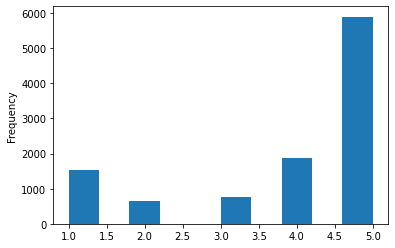

In [181]:
reviews['Overall'].plot(kind = 'hist');

<BR/>
<BR/>
<HR/>

### Is the length of the review related to the rating?

In [182]:
reviews.head()

,Title,Author,ReviewID,Overall,Content,Date,ProductID
0,Switched from Windows: More good than bad. Gr...,Jeffrey Stanley,R1DA3BK8I1XXDW,4,This is my first Mac computer. My first four ...,2009-07-06,B002C7446A
1,Macbook graduates to PRO status!,"Nate ""bigetan""",R3IO3TVYYXPJVE,5,Well I must say I am very happy i did not buy ...,2009-06-15,B002C7446A
2,Not sure why all of the haters keep griping ab...,DR,R29AN2GC4M6VZO,5,"I just got my brand new 13.3"" Macbook Pro in t...",2009-06-30,B002C7446A
3,Apple's lightest full-featured notebook,Cuyler,R3NW0EN92LKU0J,4,"There are lots of positives. First, the alumi...",2009-06-23,B002C7446A
4,A True Pro Laptop,A. Chan,R16ZRDX88506KF,5,"I purchased the Unibody MacBook in October, an...",2009-06-16,B002C7446A


In [183]:
import numpy as np

#length of each row of dataframe

reviews['Char Count'] = reviews['Content'].str.len()

In [184]:
#word count for
reviews['Word Count'] = reviews['Content'].str.split(' ').str.len()

In [185]:
reviews.head()

,Title,Author,ReviewID,Overall,Content,Date,ProductID,Char Count,Word Count
0,Switched from Windows: More good than bad. Gr...,Jeffrey Stanley,R1DA3BK8I1XXDW,4,This is my first Mac computer. My first four ...,2009-07-06,B002C7446A,14980.0,2818.0
1,Macbook graduates to PRO status!,"Nate ""bigetan""",R3IO3TVYYXPJVE,5,Well I must say I am very happy i did not buy ...,2009-06-15,B002C7446A,2297.0,415.0
2,Not sure why all of the haters keep griping ab...,DR,R29AN2GC4M6VZO,5,"I just got my brand new 13.3"" Macbook Pro in t...",2009-06-30,B002C7446A,3394.0,638.0
3,Apple's lightest full-featured notebook,Cuyler,R3NW0EN92LKU0J,4,"There are lots of positives. First, the alumi...",2009-06-23,B002C7446A,6066.0,1074.0
4,A True Pro Laptop,A. Chan,R16ZRDX88506KF,5,"I purchased the Unibody MacBook in October, an...",2009-06-16,B002C7446A,2268.0,400.0


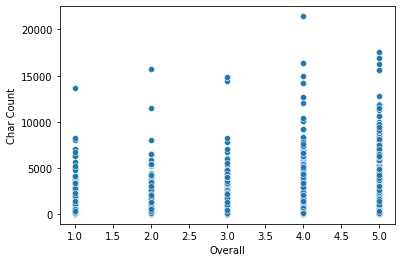

In [186]:
import seaborn as sns

sns.scatterplot(data = reviews, x = 'Overall',y = 'Char Count');

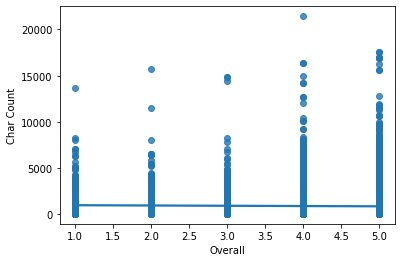

In [187]:
sns.regplot(data = reviews, x = 'Overall', y= 'Char Count');

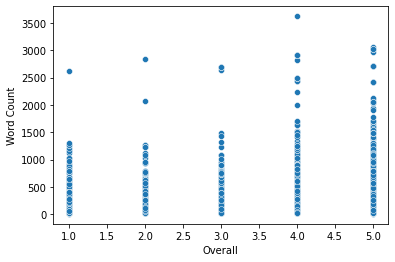

In [188]:
sns.scatterplot(data = reviews, x = 'Overall',y = 'Word Count');

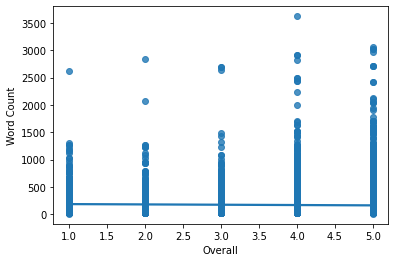

In [189]:
sns.regplot(data = reviews, x = 'Overall',y = 'Word Count');

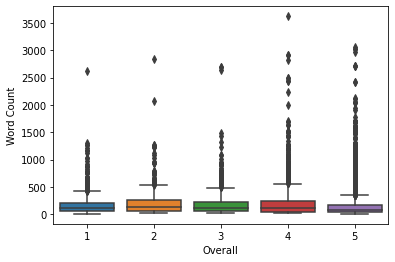

In [190]:
sns.boxplot(data = reviews, x = 'Overall',y = 'Word Count');

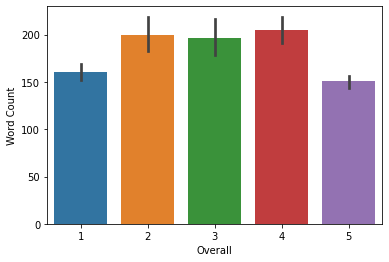

In [191]:
sns.barplot(data = reviews, x = 'Overall',y = 'Word Count');

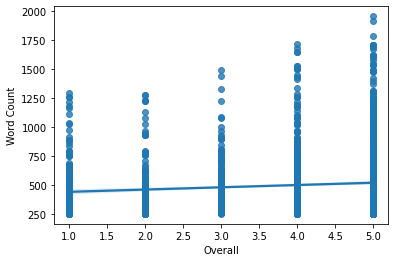

In [192]:
sns.regplot(data = reviews[(reviews['Word Count'] > 250) & (reviews['Word Count'] < 2000)], x = 'Overall',y = 'Word Count' );

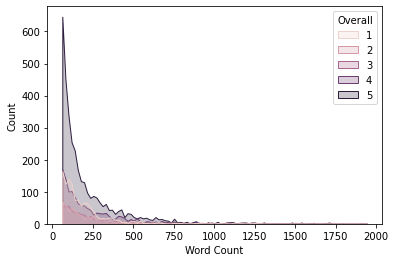

In [198]:
sns.histplot(data = reviews[(reviews['Word Count'] > 50) & (reviews['Word Count'] < 2000)], x = 'Word Count', hue =  'Overall', element = 'poly');